# Import geography data

The `stroke-maps` package contains various data files that link different geographies together.

This notebook shows how to import some useful files for use elsewhere.

The three main categories of data files are:
+ Region lookup
+ Travel times
+ Geography (locations and coordinates)

## Notebook setup

In [9]:
import stroke_maps.load_data

import matplotlib.pyplot as plt  # for showing geometry

## 1. Region lookup

The files available are:
+ stroke units to containing regions
+ LSOA to SICBL/LHB
+ SICBL/LHB to larger regions

__Stroke unit to region lookup:__

In [2]:
df_units = stroke_maps.load_data.stroke_unit_region_lookup()

df_units.head(3).T

postcode,SY231ER,CB20QQ,L97AL
stroke_team,Bronglais Hospital (Aberystwyth),"Addenbrooke's Hospital, Cambridge","University Hospital Aintree, Liverpool"
short_code,AB,AD,AI
ssnap_name,Bronglais Hospital,Addenbrooke's Hospital,University Hospital Aintree
use_ivt,1,1,1
use_mt,0,1,1
use_msu,0,1,1
transfer_unit_postcode,nearest,nearest,nearest
lsoa,Ceredigion 002A,Cambridge 013D,Liverpool 005A
lsoa_code,W01000512,E01017995,E01006654
region,Hywel Dda University Health Board,NHS Cambridgeshire and Peterborough ICB - 06H,NHS Cheshire and Merseyside ICB - 99A


__LSOA to region lookup:__

In [3]:
df_lsoa_regions = stroke_maps.load_data.lsoa_region_lookup()

df_lsoa_regions.head(3)

,,region,region_code,region_type
lsoa,lsoa_code,,,
Halton 007A,E01012367,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL
Halton 003A,E01012368,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL
Halton 005A,E01012369,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL


__Region to region lookup:__

In [4]:
df_regions = stroke_maps.load_data.region_lookup()

df_regions.head(3)

,,region_type,short_code,country,icb,icb_code,isdn
region,region_code,,,,,,
Aneurin Bevan University Health Board,W11000028,LHB,AB,Wales,NaN,NaN,NaN
"NHS Bath and North East Somerset, Swindon and Wiltshire ICB - 92G",E38000231,SICBL,BA,England,"NHS Bath and North East Somerset, Swindon and ...",E54000040,"Gloucester, BSW, BNSSG and Somerset"
Betsi Cadwaladr University Health Board,W11000023,LHB,BC,Wales,NaN,NaN,NaN


## 2. Travel times

The files available are:
+ Time from each LSOA to each stroke unit
+ Time from each stroke unit to each other stroke unit

__LSOA to stroke unit travel time lookup:__

In [5]:
df_travel_lsoa = stroke_maps.load_data.travel_time_matrix_lsoa()

# Show the first five rows and columns:
df_travel_lsoa.iloc[:5, :5]

,B152TH,B714HJ,B95SS,BA13NG,BA214AT
LSOA,,,,,
Adur 001A,173.3,179.8,171.2,161.5,152.9
Adur 001B,173.3,179.8,172.3,161.5,152.9
Adur 001C,173.3,180.9,172.3,150.8,151.9
Adur 001D,173.3,180.9,172.3,161.5,152.9
Adur 001E,174.4,180.9,173.3,150.8,151.9


__Stroke unit to other unit travel time lookup:__

In [6]:
df_travel_units = stroke_maps.load_data.travel_time_matrix_units()

# Show the first five rows and columns:
df_travel_units.iloc[:5, :5]

,B152TH,B714HJ,B95SS,BA13NG,BA214AT
from_postcode,,,,,
B152TH,0.0,18.7,18.7,107.8,155.1
B714HJ,18.7,0.0,24.1,106.8,154.0
B95SS,19.8,23.0,0.0,115.3,162.6
BA13NG,107.8,106.8,115.3,0.0,62.7
BA214AT,155.1,154.0,162.6,62.7,0.0


## 3. Geography

The files available are:
+ Stroke unit coordinates
+ Region boundaries
  + LSOA
  + Sub-Integrated Care Board Locations (SICBL) for England
  + Local Health Boards (LHB) for Wales

__Stroke unit coordinates:__

In [7]:
df_unit_coords = stroke_maps.load_data.stroke_unit_coordinates()

df_unit_coords.head(3)

,BNG_E,BNG_N,Latitude,Longitude
postcode,,,,
RM70AG,551110,187777,51.568622,0.178914
E11BB,534833,181799,51.519026,-0.058075
SW66SX,524227,176487,51.473716,-0.212722


### Region boundaries

Define this function for plotting region boundaries:

In [16]:
def plot_boundaries(gdf, title):
    """Simple plot of region boundaries."""
    fig, ax = plt.subplots(figsize=(8, 8))
    gdf['geometry'].plot(ax=ax)
    ax.axis('off')
    ax.set_title(title)
    plt.show()

__LSOA boundaries:__

In [17]:
gdf_lsoa = stroke_maps.load_data.lsoa_geography()

gdf_lsoa.head(3).T

,0,1,2
OBJECTID,1,2,3
LSOA11CD,E01000001,E01000002,E01000003
LSOA11NM,City of London 001A,City of London 001B,City of London 001C
LSOA11NMW,City of London 001A,City of London 001B,City of London 001C
BNG_E,532129,532480,532245
BNG_N,181625,181699,182036
LONG,-0.09706,-0.09197,-0.09523
LAT,51.5181,51.51868,51.52176
Shape__Area,157794.481079,164882.427628,42219.805717
Shape__Length,1685.391778,1804.828196,909.223277


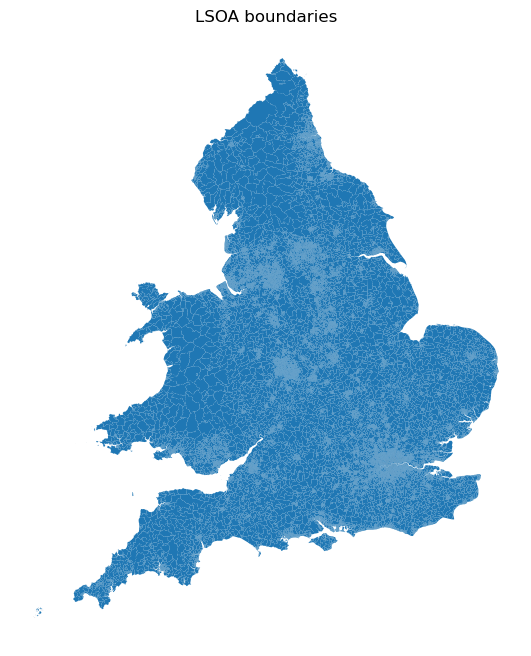

In [18]:
plot_boundaries(gdf_lsoa, 'LSOA boundaries')

__Sub-Integrated Care Board Locations (England) boundaries:__

In [19]:
gdf_sicbl = stroke_maps.load_data.sicbl_geography()

gdf_sicbl.head(3).T

,0,1,2
SICBL22CD,E38000006,E38000007,E38000008
SICBL22NM,NHS South Yorkshire ICB - 02P,NHS Mid and South Essex ICB - 99E,NHS Nottingham and Nottinghamshire ICB - 02Q
BNG_E,429979,564014,468073
BNG_N,403330,194421,384833
LONG,-1.54925,0.368068,-0.9787
LAT,53.5258,51.6247,53.35602
OBJECTID,1,2,3
GlobalID,7d3f8714-885f-41e3-b573-a3da2d523e75,0f2900d4-c813-49f0-b319-7589b4b54cfc,9c0c5221-96d2-4419-a56a-ea321b3c1511
geometry,"POLYGON ((443219.66 409833.09, 444697.051 4070...","POLYGON ((577495.812 194112.5, 576648.002 1917...","POLYGON ((479948.585 396038.289999999, 478445...."


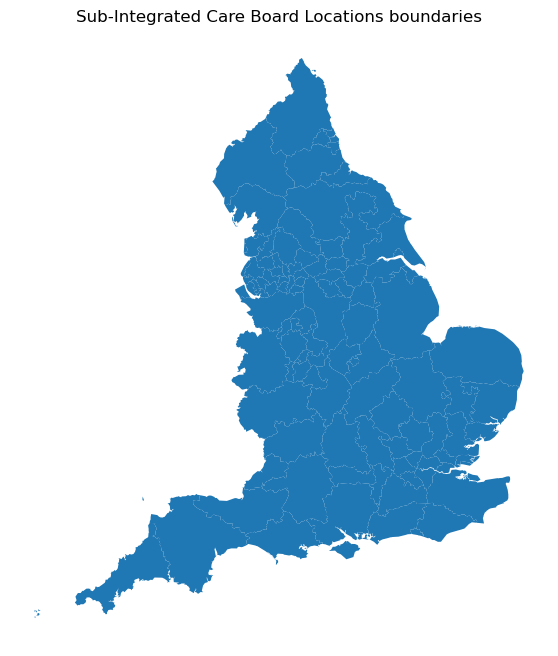

In [20]:
plot_boundaries(gdf_sicbl, 'Sub-Integrated Care Board Locations boundaries')

__Local Health Board (Wales) boundaries:__

In [21]:
gdf_lhb = stroke_maps.load_data.lhb_geography()

gdf_lhb.head(3).T

,0,1,2
OBJECTID,1,2,3
LHB20CD,W11000023,W11000024,W11000025
LHB20NM,Betsi Cadwaladr University Health Board,Powys Teaching Health Board,Hywel Dda University Health Board
LHB20NMW,Bwrdd Iechyd Prifysgol Betsi Cadwaladr,Bwrdd Iechyd Addysgu Powys,Bwrdd Iechyd Prifysgol Hywel Dda
BNG_E,282470,302328,250540
BNG_N,346124,273254,245213
LONG,-3.75275,-3.43533,-4.18274
LAT,52.99951,52.34863,52.08504
GlobalID,1b0c205c-c731-4c8c-bbf1-f2a32ffead10,bcce2d1f-465a-4188-8d98-cddb0d420ca6,477edbf9-ed04-464f-b9e8-838937b75ff0
geometry,"MULTIPOLYGON (((270269.0013 319142.795700001, ...","POLYGON ((322891.6032 333139.2992, 323007.6029...","MULTIPOLYGON (((197655.1992 193343.6987, 19765..."


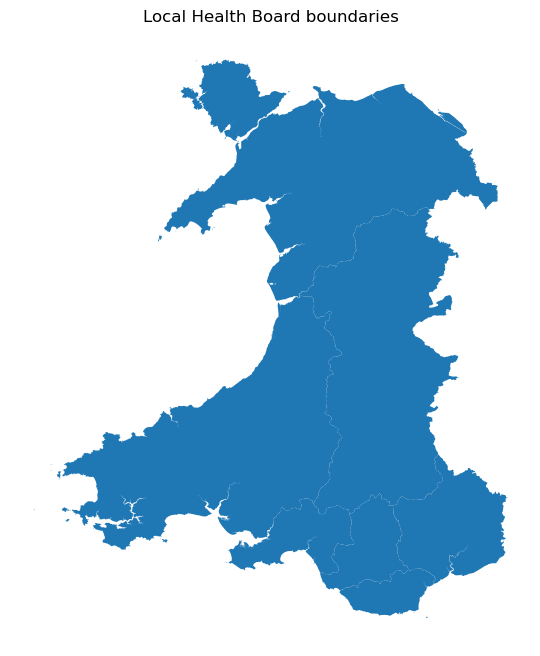

In [22]:
plot_boundaries(gdf_lhb, 'Local Health Board boundaries')

__Integrated Stroke Delivery Network (England) boundaries:__

In [23]:
gdf_isdn = stroke_maps.load_data.isdn_geography()

gdf_isdn.head(3).T

,0,1,2
isdn,Cheshire and Merseyside,"Devon, Cornwall and Isles of Scilly",East Midlands
SICBL22CD,E38000068,E38000089,E38000008
SICBL22NM,NHS Cheshire and Merseyside ICB - 01F,NHS Cornwall and The Isles Of Scilly ICB - 11N,NHS Nottingham and Nottinghamshire ICB - 02Q
BNG_E,354246,212497,468073
BNG_N,382146,64493,384833
LONG,-2.68853,-4.64254,-0.9787
LAT,53.33424,50.45022,53.35602
OBJECTID,21,26,3
GlobalID,5b8a7d45-6732-495b-a704-d9c03e531b35,62c4814f-341b-4912-8a3c-e52520fa4b07,9c0c5221-96d2-4419-a56a-ea321b3c1511
geometry,"POLYGON ((379198.89 384550.021, 380330.5 38356...",MULTIPOLYGON (((87767.5686999997 8868.28480000...,"POLYGON ((501950.096 305791.095000001, 503614...."


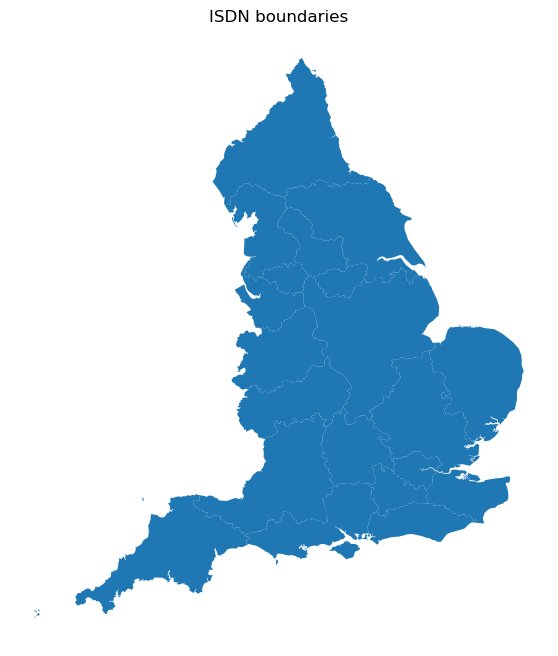

In [24]:
plot_boundaries(gdf_isdn, 'ISDN boundaries')